<a href="https://colab.research.google.com/github/Abdansb/NoCopyZone/blob/main/NoCopyZone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Run this code with Runtime > Run all

# To-Do

*   Gather all selenium result in one list
*   learn regex
*   fix result URL's with prefix "/"
*   scrape via HTTP traffic
*   scrape via source (js, html, and other files)

<div>
<img src="https://drive.usercontent.google.com/download?id=1kh0VlEu1NDOVqXyYKHzFviRMCyIOwpgZ&export=download&authuser=0&confirm=t&uuid=39cde4b1-3c0f-49a2-9624-162fc043d877&at=APZUnTXs12dtKQbVEqDxjjwtmEw2:1702054613486" width="400"/>
</div>





# Install Dependecies

###Bash scripting, accessing google colab terminal. Install python packages to their OS

In [ ]:
! pip install requests bs4
! pip install selenium
! pip install ipython-autotime
! apt-get update
! apt install chromium-chromedriver

# Using Selenium & Regular Expression

*   Weekend kulik TDD Test-driven development
*   Currently scrape all links in "a" tag
*   PR! some websites use hidden js






In [324]:
# Run this again if encountered connection refused
# Imports and configure chrome browser
%load_ext autotime
import time
import re
import html
from itertools import product
from urllib.parse import urlparse
from selenium.webdriver.common.by import By
from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') #headless means no graphical user interface
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=chrome_options)

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.07 s (started: 2023-12-09 21:03:38 +00:00)


## Level 1
### Replace main_page URL with website you want to crawl

example:
* https://vidio.com
* https://www.livescore90bola.

not accepted URL:
* `https://example.com/`
* `https://example.com#`

(additional char after domain)


https://www.youtube.com/channel/UCSMkjRpTQfwM601z3KSzg0g
https://livescore90bola.com/bisbol.html
https://www.googletagmanager.com/gtag/js?id=G-GLFZLGGXBP
https://www.googletagmanager.com/gtag/js?id=G-4V0T4Z0TT1&l=dataLayer&cx=c
https://www.googletagmanager.com/gtag/js?id=G-RJTK2K3STW
https://livescore90bola.com/./banner2.html
https://www.facebook.com/90bola.io/
https://livescore90bola.com/banner4.html
https://livescore90bola.com/90bola.htm
https://855group.page.link/fifa855
https://livescore90bola.com/kalkulator.html
https://www.googletagmanager.com/gtag/js?id=G-GLFZLGGXBP&l=dataLayer&cx=c
https://livescore90bola.com/petagratis.html
https://livescore90bola.com/portugal.html
https://livescore90bola.com/perancis.html
https://www.google-analytics.com/analytics.js
https://livescore90bola.com/#fb
https://livescore90bola.com/bursa.html
https://livescore90bola.com/sitemap.xml
https://livescore90bola.com/jerman.html
https://livescore90bola.com/1x2.html
https://livescore90bola.com/javascript:wi
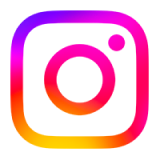
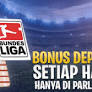
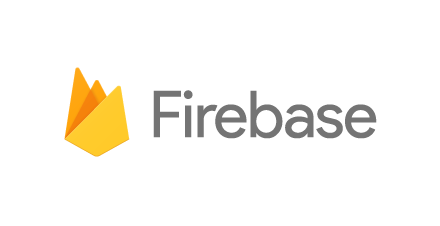
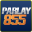
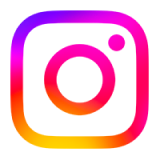
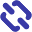
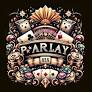

In [326]:
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import WebDriverException

main_page = 'https://livescore90bola.com'
parsed_url = urlparse(main_page)
main_domain = f"{parsed_url.scheme}://{parsed_url.netloc}"
driver.get(main_page)

# List of unique tag names and attribute prefixes
tag_names = ['a', 'div', 'script', 'iframe']
prefix_string = ['href=', 'src=']
# Generate combinations
combinations = product(tag_names, prefix_string)

level1 = []

def scrape_html(tag_name, prefix_string, var_to_store):

  # Get element by tag: <a> or <div> or <script>
  links = driver.find_elements(By.TAG_NAME, tag_name)

  for link in links:
    # Get raw html (ambil satu baris)
    html_string = link.get_attribute('outerHTML')

    # Capture string after prefix
    pattern = re.compile(rf'{re.escape(prefix_string)}"(.*?)"')
    pattern = pattern.search(html_string)

    if pattern:
      var_to_store.append(pattern.group(1))


def find_true_link(url_container):
  unfiltered = []
  for address in url_container:
    unfiltered.append(address)

  filter1 = []
  for f1 in unfiltered:
    if len(f1)>1:
      filter1.append(f1)

  filter2 = []
  for f2 in filter1:
    if f2.startswith("http"):
      filter2.append(f2)
    elif f2.endswith(".html"):
      filter2.append(f"{main_domain}/{f2}")
    else: filter2.append(f"{main_domain}/{f2}")

  # Remove Duplicates
  no_duplicate = list(set(filter2))
  filter3 = []

  # Remove escape sequence
  for filter in no_duplicate:
    filter3.append(html.unescape(filter))
    #print(html.unescape(filter))

  return filter3

#call
# Iterate over combinations
for tag, prefix in combinations:
    scrape_html(tag, prefix, level1)
final1 = find_true_link(level1)

for link in final1:
  print(link)
print(f"\nLevel 1 result: {len(final)} URL's")

final2 = []
level2 = []

for url in final1:
  driver.get(url)
  # Tag combinations of getting URL's
  scrape_html('a', 'href=', level2)
  scrape_html('a', 'src=', level2)
  scrape_html('div', 'href=', level2)
  scrape_html('div', 'src=', level2)
  scrape_html('script', 'href=', level2)
  scrape_html('script', 'src=', level2)
  scrape_html('iframe', 'src=', level2)
  final2 += (find_true_link(level2))

final2 = set(final2)

for link in final2:
  print(link)
print(f"\nLevel 2 result: {len(final2)} URL's")

final3 = []
level3 = []

for url in final2:
  try:
    driver.get(url)
  except WebDriverException:
    continue

  try:
    # Tag combinations of getting URL's
    scrape_html('a', 'href=', level3)
    scrape_html('a', 'src=', level3)
    scrape_html('div', 'href=', level3)
    scrape_html('div', 'src=', level3)
    scrape_html('script', 'href=', level3)
    scrape_html('script', 'src=', level3)
    scrape_html('iframe', 'src=', level3)
    final3 += (find_true_link(level3))
  except StaleElementReferenceException:
    continue


final3 = set(final3)

for link in final3:
  print(link)


print(f"\nLevel 3 result: {len(final3)} URL's")


In [327]:
import openpyxl

def write_lists_to_excel(lists, excel_filename):
    workbook = openpyxl.Workbook()
    sheet = workbook.active

    # Transpose the lists to have each list variable in a separate column
    transposed_lists = zip(*lists)

    # Write the transposed data to the Excel sheet
    for col_idx, col_data in enumerate(transposed_lists, start=1):
        for row_idx, value in enumerate(col_data, start=1):
            sheet.cell(row=row_idx, column=col_idx, value=value)

    # Save the workbook to the specified file
    workbook.save(excel_filename)

# Example usage
list1 = final1
list2 = final2
list3 = final3

write_lists_to_excel([list1, list2, list3], '90bola.xlsx')


time: 506 ms (started: 2023-12-09 21:33:28 +00:00)


### If raised stale exception

In [298]:
from selenium.common.exceptions import StaleElementReferenceException

try:

except StaleElementReferenceException:
  continue

time: 1 ms (started: 2023-12-09 19:07:23 +00:00)


In [ ]:
dup = set(final3)
for one in dup:
  print(one)
print(len(dup))

##v3

In [ ]:
temp = []


for url in final:
  driver.get(url)
  #for tag, prefix in combinations:
  scrape_html('a', 'href=', temp)

final2 = find_true_link(temp)


print(f"\nTotal result: {len(final2)} URL's")


In [250]:
find_true_link(temp)
for link in temp:
  print(link)
print(f"\nTotal result: {len(temp)} URL's")

https://855group.page.link/sport388
https://www.youtube.com/channel/UCSMkjRpTQfwM601z3KSzg0g
https://livescore90bola.com/bisbol.html
https://livescore90bola.com/hasil-90bola.htm
https://gamesport855.page.link/ayoputri
https://livescore90bola.com/mailto:90bola.io@gmail.com
https://marketingratu.page.link/makauqq
https://855group.page.link/parlay855
https://gamesport.page.link/fifa855
https://livescore90bola.com//Main.aspx?ref=29C60F
https://livescore90bola.com/hdp-90bola.htm
https://www.facebook.com/90bola.io/
https://livescore90bola.com/1x2-90bola.htm
https://livescore90bola.com/90bola.htm
https://855group.page.link/fifa855
https://livescore90bola.com/kalkulator.html
https://www.youtube.com/channel/UCipz04gIxbXPeXZSrhwtBCg
https://855group.page.link/ft95
https://marketingratu.page.link/aduqq
https://livescore90bola.com/petagratis.html
https://livescore90bola.com/portugal.html
https://855group.page.link/sport855
https://marketingratu.page.link/rutinqq
https://855group.page.link/big855
h

In [ ]:
flag = True
lim = 10
temp = []
final2 = []
"""while flag:
    try:
        for link in final:
            driver.get("https://www.facebook.com/90bola.io/")
            #call
            # Iterate over combinations
            for tag, prefix in combinations:
                scrape_html(tag, prefix, temp)
            final2 = find_true_link(temp)
            print(final2)
    except Exception as e:
        print(e)"""


driver = webdriver.Chrome(options=chrome_options)
for link in final:
  #print(link)
  #driver.quit()
  for tag, prefix in combinations:
    driver.get(link)
    scrape_html(tag, prefix, temp)
    final2 = find_true_link(temp)
    print(final2)
  #final2 = find_true_link(temp)


## v2

In [ ]:
driver.get('https://livescore90bola.com')


tag = 'div'
prefix = 'src='
url = []

def scrape_html(tag_name, prefix_string):

  # Get element by tag: <a> or <div> or <script>
  links = driver.find_elements(By.TAG_NAME, tag_name)

  for link in links:
    # Get raw html (ambil satu baris)
    html_string = link.get_attribute('outerHTML')

    # Capture string after prefix
    pattern = re.compile(rf'{re.escape(prefix_string)}"(.*?)"')
    pattern = pattern.search(html_string)


    if pattern:
      url.append(pattern.group(1))

    #print(url)

# Tag combinations of getting URL's
scrape_html('a', 'href=')
scrape_html('a', 'src=')
scrape_html('div', 'href=')
scrape_html('div', 'src=')
scrape_html('script', 'href=')
scrape_html('script', 'src=')


for address in url:
  print(address)


/
https://www.facebook.com/90bola.io/
https://www.youtube.com/channel/UCSMkjRpTQfwM601z3KSzg0g
https://www.instagram.com/90bola.io/
/
/
basket.html
bisbol.html
kalkulator.html
/
https://www.facebook.com/90bola.io/
jadwal.html
hasil.html
1x2.html
https://nowgoal5.io/
bursa.html
indonesia.html
champion.html
eropa.html
inggris.html
italia.html
spanyol.html
jerman.html
perancis.html
portugal.html
javascript:window.scroll(0,0);
tentang-kami.html
#
#fb
petagratis.html
sitemap.xml
#
petagratis.html
#
#
#
https://livescore90bola.com/
tentang-kami.html
#
#
https://855group.page.link/fifa855
tentang-kami.html
/
/



/
indonesia.html
indonesia.html
indonesia.html
javascript:window.scroll(0,0);
./banner2.html
./banner3.html
./banner3.html
./banner3.html
//freelive.7msport.com/U_fLeftRight.aspx?width=815&amp;height=25&amp;file=1&amp;mark=3&amp;title=scores&amp;urls=http://&amp;timezone=&quot;%2B0700&quot;&amp;dstbox=
banner4.html
90bola.htm
https://www.google-analytics.com/analytics.js
https://www.

## v1

In [14]:
driver.get('https://livescore90bola.com/')
# Get element by tag: <a> or <div> or <script>

# combinations of getting URL's

#links = driver.find_elements(By.TAG_NAME, 'a')
links = driver.find_elements(By.TAG_NAME, 'div')
#links = driver.find_elements(By.TAG_NAME, 'script')

# Iterate over links list
for link in links:

  # Get raw html (ambil satu baris)
  html_string = link.get_attribute('outerHTML')

  # Capture string after "href="
  #url_match = re.search(r'href="(.*?)"', html_string)

  # Capture string after "src="
  url_match = re.search(r'src="(.*?)"', html_string)

  if url_match:
    url = url_match.group(1)

  print(url)

import html

url_with_entities = "https://www.fctables.com/championsleague/iframe/?type=table&amp;lang_id=2&amp;country=5&amp;stage=33212&amp;team=&amp;timezone=Pacific/Midway&amp;time=24&amp;po=1&amp;ma=1&amp;wi=1&amp;dr=1&amp;los=1&amp;gf=1&amp;ga=1&amp;gd=1&amp;pts=1&amp;ng=1&amp;form=1&amp;width=auto&amp;height=160&amp;font=Verdana&amp;fs=12&amp;lh=22&amp;bg=FFFFFF&amp;fc=333333&amp;logo=1&amp;tlink=0&amp;scfs=22&amp;scfc=333333&amp;scb=1&amp;sclg=0&amp;teamls=80&amp;ths=1&amp;thb=1&amp;thba=FFFFFF&amp;thc=000000&amp;bc=dddddd&amp;hob=f5f5f5&amp;hobc=ebe7e7&amp;lc=333333&amp;sh=1&amp;hfb=1&amp;hbc=054486&amp;hfc=FFFFFF"

url_decoded = html.unescape(url_with_entities)

print(url_decoded)



from urllib.parse import urlparse

url = 'https://livescore90bola.com/champion.html'

# Mecah URL menjadi komponen-komponen
parsed_url = urlparse(url)

# Dapatkan domain dan subdomain
domain = f"{parsed_url.scheme}://{parsed_url.netloc}"
subdomain = f"{parsed_url.scheme}://{parsed_url.hostname}"

print(f'Domain: {domain}')
print(f'Subdomain: {subdomain}')



./banner2.html
./banner3.html
./banner3.html
./banner3.html
./banner3.html
./banner3.html
//freelive.7msport.com/U_fLeftRight.aspx?width=815&amp;height=25&amp;file=1&amp;mark=3&amp;title=scores&amp;urls=http://&amp;timezone=&quot;%2B0700&quot;&amp;dstbox=
banner4.html
90bola.htm
90bola.htm
90bola.htm


# Gak jadi
# Using BeautifulSoup

In [78]:
import requests
from bs4 import BeautifulSoup
import re

# import time

source_code = requests.get("https://855group.page.link/fifa855")
soup = BeautifulSoup(source_code.content, "lxml")
data = []
links = []


def remove_duplicates(l):  # remove duplicates and unURL string
    for item in l:
        match = re.search("(?P<url>[^\s]+)", item)
        if match is not None:
            links.append((match.group("url")))


for link in soup.find_all("a", href=True):
    data.append(str(link.get("href")))
flag = True
remove_duplicates(data)
lim = 50
"""while flag:
    try:
        for link in links:
            for j in soup.find_all("a", href=True):
                temp = []
                source_code = requests.get(link)
                soup = BeautifulSoup(source_code.content, "lxml")
                temp.append(str(j.get("href")))
                remove_duplicates(temp)
                print(temp)

                if len(links) > lim:  # set limitation to number of URLs
                    break
            if len(links) > lim:
                break
        if len(links) > lim:
            break
    except Exception as e:
        print(e)
        if len(links) > lim:
            break"""

for url in links:
    print(url)

print(len(links))


/?ref=29C60F
/Main.aspx?ref=29C60F
#
#
#
#
#
#
#
#
https://sosmedmaster.page.link/wa_fifa855
https://sosmedmaster.page.link/tele_fifa855
https://sosmedmaster.page.link/fb_fifa855
https://sosmedmaster.page.link/ig_fifa855
https://fifa855.rtpgacormalamini.com/
https://pkv99games.page.link/ruangqq
https://pkv99games.page.link/terimaqq
17


## test parser

In [17]:
from bs4 import BeautifulSoup
import requests

# Make an HTTP request and parse the HTML
url = "https://vidio.com/"
source_code = requests.get(url)
soup = BeautifulSoup(source_code.content, "html.parser")

# Find all script tags with a src attribute
script_tags = soup.find_all("div", href=True)

# Print the src attribute of each script tag
for script_tag in script_tags:
    print(script_tag['href'])


## input combinations

In [ ]:
from itertools import product

def scrape_html(tag_name, attribute_prefix):
    # Your implementation for scrape_html function
    # This is just a placeholder, you should replace it with your actual code
    print(f"Scraping {tag_name} with {attribute_prefix}")

# List of unique tag names and attribute prefixes
unique_tag_names = ['a', 'div', 'script', 'iframe']
unique_attribute_prefixes = ['href=', 'src=']

# Generate combinations
combinations = product(unique_tag_names, unique_attribute_prefixes)

# Iterate over combinations
for tag, prefix in combinations:
    scrape_html(tag, prefix)
